In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## 1.Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [80]:
mp_drawing.draw_landmarks??

In [7]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.face_landmarks.landmark)

NameError: name 'results' is not defined

In [7]:
results

NameError: name 'results' is not defined

In [10]:
draw_landmarks(frame, results)

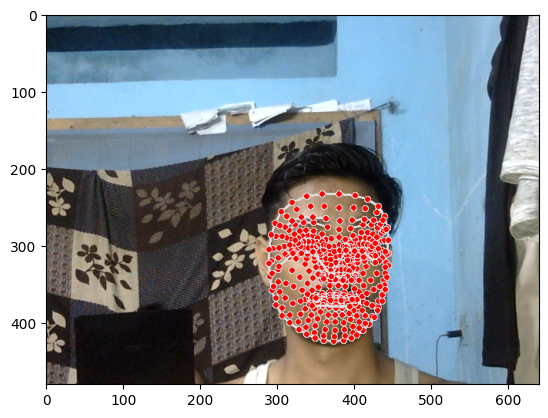

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## 2 .Extract Keypoint Values

In [44]:
len(results.face_landmarks.landmark)

468

In [6]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

NameError: name 'results' is not defined

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
if results.face_landmarks:
    pass
else :
    np.zeros(1404)

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.5790897 ,  0.70968336, -1.24711263, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
468*3+33*4+21*3+21*3

1662

In [19]:
np.save('0.npy', result_test)

In [20]:
np.load('0.npy')

array([ 0.5790897 ,  0.70968336, -1.24711263, ...,  0.        ,
        0.        ,  0.        ])

## 3. Setup Folders for Collection

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [22]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks
# I love you

In [23]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## 4. Collect Keypoint Values for Training and Testing

In [25]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [25]:
cap.release()
cv2.destroyAllWindows()

## 5. Preprocess Data and Create Labels and Features

In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [27]:
label_map = {label:num for num, label in enumerate(actions)}

In [28]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [29]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [30]:
np.array(sequences).shape

(90, 30, 1662)

In [31]:
np.array(labels).shape

(90,)

In [32]:
X = np.array(sequences)

In [33]:
X.shape

(90, 30, 1662)

In [34]:
y = to_categorical(labels).astype(int)

In [35]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [37]:
y_test.shape

(5, 3)

## 6. Build and Train LSTM Neural Network

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [3]:
import os

In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [41]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [42]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [45]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000


3/3 [==============================] - 5s 37ms/step - loss: 8.0677 - categorical_accuracy: 0.3647
Epoch 2/2000
3/3 [==============================] - 0s 36ms/step - loss: 5.7523 - categorical_accuracy: 0.2588
Epoch 3/2000
3/3 [==============================] - 0s 40ms/step - loss: 5.6481 - categorical_accuracy: 0.2941
Epoch 4/2000
3/3 [==============================] - 0s 39ms/step - loss: 8.2784 - categorical_accuracy: 0.3529
Epoch 5/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.1901 - categorical_accuracy: 0.3647
Epoch 6/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.0659 - categorical_accuracy: 0.4706
Epoch 7/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.9266 - categorical_accuracy: 0.5412
Epoch 8/2000
3/3 [==============================] - 0s 38ms/step - loss: 1.4109 - categorical_accuracy: 0.4471
Epoch 9/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.8135 - categorical_accuracy: 0.3176

3/3 [==============================] - 0s 42ms/step - loss: 0.0809 - categorical_accuracy: 0.9647
Epoch 286/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.0640 - categorical_accuracy: 0.9765
Epoch 287/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.0627 - categorical_accuracy: 0.9882
Epoch 288/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0943 - categorical_accuracy: 0.9647
Epoch 289/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.0889 - categorical_accuracy: 0.9647
Epoch 290/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.0567 - categorical_accuracy: 0.9882
Epoch 291/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.0393 - categorical_accuracy: 0.9882
Epoch 292/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.0551 - categorical_accuracy: 0.9765
Epoch 293/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0395 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 35ms/step - loss: 2.9443e-04 - categorical_accuracy: 1.0000
Epoch 429/2000
3/3 [==============================] - 0s 39ms/step - loss: 2.8421e-04 - categorical_accuracy: 1.0000
Epoch 430/2000
3/3 [==============================] - 0s 40ms/step - loss: 2.7345e-04 - categorical_accuracy: 1.0000
Epoch 431/2000
3/3 [==============================] - 0s 38ms/step - loss: 2.6631e-04 - categorical_accuracy: 1.0000
Epoch 432/2000
3/3 [==============================] - 0s 37ms/step - loss: 2.5691e-04 - categorical_accuracy: 1.0000
Epoch 433/2000
3/3 [==============================] - 0s 37ms/step - loss: 2.4849e-04 - categorical_accuracy: 1.0000
Epoch 434/2000
3/3 [==============================] - 0s 37ms/step - loss: 2.4077e-04 - categorical_accuracy: 1.0000
Epoch 435/2000
3/3 [==============================] - 0s 38ms/step - loss: 2.3248e-04 - categorical_accuracy: 1.0000
Epoch 436/2000
3/3 [==============================] - 0s 35ms/step - loss: 2.24

3/3 [==============================] - 0s 38ms/step - loss: 4.1284e-05 - categorical_accuracy: 1.0000
Epoch 569/2000
3/3 [==============================] - 0s 38ms/step - loss: 4.0988e-05 - categorical_accuracy: 1.0000
Epoch 570/2000
3/3 [==============================] - 0s 38ms/step - loss: 4.0627e-05 - categorical_accuracy: 1.0000
Epoch 571/2000
3/3 [==============================] - 0s 43ms/step - loss: 4.0353e-05 - categorical_accuracy: 1.0000
Epoch 572/2000
3/3 [==============================] - 0s 40ms/step - loss: 4.0101e-05 - categorical_accuracy: 1.0000
Epoch 573/2000
3/3 [==============================] - 0s 34ms/step - loss: 3.9858e-05 - categorical_accuracy: 1.0000
Epoch 574/2000
3/3 [==============================] - 0s 39ms/step - loss: 3.9574e-05 - categorical_accuracy: 1.0000
Epoch 575/2000
3/3 [==============================] - 0s 39ms/step - loss: 3.9323e-05 - categorical_accuracy: 1.0000
Epoch 576/2000
3/3 [==============================] - 0s 38ms/step - loss: 3.90

3/3 [==============================] - 0s 35ms/step - loss: 1.8291e-05 - categorical_accuracy: 1.0000
Epoch 709/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.8208e-05 - categorical_accuracy: 1.0000
Epoch 710/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.8128e-05 - categorical_accuracy: 1.0000
Epoch 711/2000
3/3 [==============================] - 0s 35ms/step - loss: 1.8051e-05 - categorical_accuracy: 1.0000
Epoch 712/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.7981e-05 - categorical_accuracy: 1.0000
Epoch 713/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.7877e-05 - categorical_accuracy: 1.0000
Epoch 714/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.7780e-05 - categorical_accuracy: 1.0000
Epoch 715/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.7720e-05 - categorical_accuracy: 1.0000
Epoch 716/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.76

3/3 [==============================] - 0s 35ms/step - loss: 1.0390e-05 - categorical_accuracy: 1.0000
Epoch 849/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0350e-05 - categorical_accuracy: 1.0000
Epoch 850/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.0319e-05 - categorical_accuracy: 1.0000
Epoch 851/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.0282e-05 - categorical_accuracy: 1.0000
Epoch 852/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.0242e-05 - categorical_accuracy: 1.0000
Epoch 853/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.0198e-05 - categorical_accuracy: 1.0000
Epoch 854/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.0157e-05 - categorical_accuracy: 1.0000
Epoch 855/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.0124e-05 - categorical_accuracy: 1.0000
Epoch 856/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.00

3/3 [==============================] - 0s 35ms/step - loss: 6.5086e-06 - categorical_accuracy: 1.0000
Epoch 989/2000
3/3 [==============================] - 0s 41ms/step - loss: 6.4988e-06 - categorical_accuracy: 1.0000
Epoch 990/2000
3/3 [==============================] - 0s 35ms/step - loss: 6.4791e-06 - categorical_accuracy: 1.0000
Epoch 991/2000
3/3 [==============================] - 0s 35ms/step - loss: 6.4539e-06 - categorical_accuracy: 1.0000
Epoch 992/2000
3/3 [==============================] - 0s 40ms/step - loss: 6.4230e-06 - categorical_accuracy: 1.0000
Epoch 993/2000
3/3 [==============================] - 0s 40ms/step - loss: 6.4090e-06 - categorical_accuracy: 1.0000
Epoch 994/2000
3/3 [==============================] - 0s 40ms/step - loss: 6.3936e-06 - categorical_accuracy: 1.0000
Epoch 995/2000
3/3 [==============================] - 0s 35ms/step - loss: 6.3768e-06 - categorical_accuracy: 1.0000
Epoch 996/2000
3/3 [==============================] - 0s 40ms/step - loss: 6.34

3/3 [==============================] - 0s 36ms/step - loss: 4.3700e-06 - categorical_accuracy: 1.0000
Epoch 1127/2000
3/3 [==============================] - 0s 36ms/step - loss: 4.3531e-06 - categorical_accuracy: 1.0000
Epoch 1128/2000
3/3 [==============================] - 0s 35ms/step - loss: 4.3461e-06 - categorical_accuracy: 1.0000
Epoch 1129/2000
3/3 [==============================] - 0s 36ms/step - loss: 4.3335e-06 - categorical_accuracy: 1.0000
Epoch 1130/2000
3/3 [==============================] - 0s 36ms/step - loss: 4.3223e-06 - categorical_accuracy: 1.0000
Epoch 1131/2000
3/3 [==============================] - 0s 37ms/step - loss: 4.3111e-06 - categorical_accuracy: 1.0000
Epoch 1132/2000
3/3 [==============================] - 0s 36ms/step - loss: 4.2970e-06 - categorical_accuracy: 1.0000
Epoch 1133/2000
3/3 [==============================] - 0s 34ms/step - loss: 4.2788e-06 - categorical_accuracy: 1.0000
Epoch 1134/2000
3/3 [==============================] - 0s 35ms/step - lo

3/3 [==============================] - 0s 40ms/step - loss: 3.0615e-06 - categorical_accuracy: 1.0000
Epoch 1265/2000
3/3 [==============================] - 0s 39ms/step - loss: 3.0517e-06 - categorical_accuracy: 1.0000
Epoch 1266/2000
3/3 [==============================] - 0s 38ms/step - loss: 3.0447e-06 - categorical_accuracy: 1.0000
Epoch 1267/2000
3/3 [==============================] - 0s 37ms/step - loss: 3.0363e-06 - categorical_accuracy: 1.0000
Epoch 1268/2000
3/3 [==============================] - 0s 38ms/step - loss: 3.0293e-06 - categorical_accuracy: 1.0000
Epoch 1269/2000
3/3 [==============================] - 0s 38ms/step - loss: 3.0208e-06 - categorical_accuracy: 1.0000
Epoch 1270/2000
3/3 [==============================] - 0s 38ms/step - loss: 3.0208e-06 - categorical_accuracy: 1.0000
Epoch 1271/2000
3/3 [==============================] - 0s 37ms/step - loss: 3.0068e-06 - categorical_accuracy: 1.0000
Epoch 1272/2000
3/3 [==============================] - 0s 39ms/step - lo

3/3 [==============================] - 0s 39ms/step - loss: 2.2088e-06 - categorical_accuracy: 1.0000
Epoch 1403/2000
3/3 [==============================] - 0s 39ms/step - loss: 2.2060e-06 - categorical_accuracy: 1.0000
Epoch 1404/2000
3/3 [==============================] - 0s 40ms/step - loss: 2.1990e-06 - categorical_accuracy: 1.0000
Epoch 1405/2000
3/3 [==============================] - 0s 39ms/step - loss: 2.1990e-06 - categorical_accuracy: 1.0000
Epoch 1406/2000
3/3 [==============================] - 0s 39ms/step - loss: 2.1892e-06 - categorical_accuracy: 1.0000
Epoch 1407/2000
3/3 [==============================] - 0s 40ms/step - loss: 2.1864e-06 - categorical_accuracy: 1.0000
Epoch 1408/2000
3/3 [==============================] - 0s 40ms/step - loss: 2.1822e-06 - categorical_accuracy: 1.0000
Epoch 1409/2000
3/3 [==============================] - 0s 43ms/step - loss: 2.1752e-06 - categorical_accuracy: 1.0000
Epoch 1410/2000
3/3 [==============================] - 0s 35ms/step - lo

3/3 [==============================] - 0s 39ms/step - loss: 1.6002e-06 - categorical_accuracy: 1.0000
Epoch 1541/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.5960e-06 - categorical_accuracy: 1.0000
Epoch 1542/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.5932e-06 - categorical_accuracy: 1.0000
Epoch 1543/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.5904e-06 - categorical_accuracy: 1.0000
Epoch 1544/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.5876e-06 - categorical_accuracy: 1.0000
Epoch 1545/2000
3/3 [==============================] - 0s 39ms/step - loss: 1.5834e-06 - categorical_accuracy: 1.0000
Epoch 1546/2000
3/3 [==============================] - 0s 39ms/step - loss: 1.5792e-06 - categorical_accuracy: 1.0000
Epoch 1547/2000
3/3 [==============================] - 0s 39ms/step - loss: 1.5778e-06 - categorical_accuracy: 1.0000
Epoch 1548/2000
3/3 [==============================] - 0s 40ms/step - lo

3/3 [==============================] - 0s 40ms/step - loss: 1.1724e-06 - categorical_accuracy: 1.0000
Epoch 1679/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.1710e-06 - categorical_accuracy: 1.0000
Epoch 1680/2000
3/3 [==============================] - 0s 39ms/step - loss: 1.1668e-06 - categorical_accuracy: 1.0000
Epoch 1681/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.1626e-06 - categorical_accuracy: 1.0000
Epoch 1682/2000
3/3 [==============================] - 0s 35ms/step - loss: 1.1626e-06 - categorical_accuracy: 1.0000
Epoch 1683/2000
3/3 [==============================] - 0s 39ms/step - loss: 1.1584e-06 - categorical_accuracy: 1.0000
Epoch 1684/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.1570e-06 - categorical_accuracy: 1.0000
Epoch 1685/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.1556e-06 - categorical_accuracy: 1.0000
Epoch 1686/2000
3/3 [==============================] - 0s 40ms/step - lo

3/3 [==============================] - 0s 40ms/step - loss: 8.5550e-07 - categorical_accuracy: 1.0000
Epoch 1817/2000
3/3 [==============================] - 0s 40ms/step - loss: 8.5269e-07 - categorical_accuracy: 1.0000
Epoch 1818/2000
3/3 [==============================] - 0s 39ms/step - loss: 8.5129e-07 - categorical_accuracy: 1.0000
Epoch 1819/2000
3/3 [==============================] - 0s 40ms/step - loss: 8.5129e-07 - categorical_accuracy: 1.0000
Epoch 1820/2000
3/3 [==============================] - 0s 40ms/step - loss: 8.4708e-07 - categorical_accuracy: 1.0000
Epoch 1821/2000
3/3 [==============================] - 0s 40ms/step - loss: 8.4708e-07 - categorical_accuracy: 1.0000
Epoch 1822/2000
3/3 [==============================] - 0s 40ms/step - loss: 8.4568e-07 - categorical_accuracy: 1.0000
Epoch 1823/2000
3/3 [==============================] - 0s 39ms/step - loss: 8.4568e-07 - categorical_accuracy: 1.0000
Epoch 1824/2000
3/3 [==============================] - 0s 39ms/step - lo

3/3 [==============================] - 0s 38ms/step - loss: 6.4092e-07 - categorical_accuracy: 1.0000
Epoch 1955/2000
3/3 [==============================] - 0s 39ms/step - loss: 6.3952e-07 - categorical_accuracy: 1.0000
Epoch 1956/2000
3/3 [==============================] - 0s 42ms/step - loss: 6.3812e-07 - categorical_accuracy: 1.0000
Epoch 1957/2000
3/3 [==============================] - 0s 41ms/step - loss: 6.3671e-07 - categorical_accuracy: 1.0000
Epoch 1958/2000
3/3 [==============================] - 0s 44ms/step - loss: 6.3531e-07 - categorical_accuracy: 1.0000
Epoch 1959/2000
3/3 [==============================] - 0s 37ms/step - loss: 6.3531e-07 - categorical_accuracy: 1.0000
Epoch 1960/2000
3/3 [==============================] - 0s 42ms/step - loss: 6.3110e-07 - categorical_accuracy: 1.0000
Epoch 1961/2000
3/3 [==============================] - 0s 39ms/step - loss: 6.2830e-07 - categorical_accuracy: 1.0000
Epoch 1962/2000
3/3 [==============================] - 0s 40ms/step - lo

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

## 7. Make Predictions

In [50]:
res = model.predict(X_test)

1/1 [==============================] - 0s 23ms/step


In [59]:
actions[np.argmax(res[2])]

'hello'

In [60]:
actions[np.argmax(y_test[2])]

'hello'

## 8. Save Weights

In [61]:
model.save('action.h5')

C:\Users\dayas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 9. Evaluation using Confusion Matrix and Accuracy

In [4]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [63]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 35ms/step


In [64]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [65]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [1, 2]],

       [[2, 1],
        [0, 2]]], dtype=int64)

In [66]:
accuracy_score(ytrue, yhat)

0.8

## 10. Test in Real Time

In [5]:
from scipy import stats

In [2]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [5]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'res' is not defined

<Figure size 1800x1800 with 0 Axes>

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()